# Support Vector Machine Project - IRIS Dataset


# The Iris flower dataset or Fishers Iris dataset is a multivariate dataset
The Iris Dataset contains four features (length and width of sepals and petals) of 50 samples of three class of Iris
(Iris Setosa, Iris Virginica, Iris Versicolor).
It Contains the measurements for 150 Iris flowers from three different class.

# Import Liabraries

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Loading the dataset 

In [98]:
column_name=['sepal_length','sepal_width','petal_length','petal_width','class']
df=pd.read_csv("iris.csv",names=column_name,index_col=None)

# The Data at a glance

In [99]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [100]:
df.shape

(150, 5)

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# We can get a Statistical Summary of the dataset using describe() method

In [102]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Checking Missing Values

In [103]:
df.isna()

,sepal_length,sepal_width,petal_length,petal_width,class
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [104]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

In [105]:
df.value_counts()

sepal_length  sepal_width  petal_length  petal_width  class          
4.9           3.1          1.5           0.1          Iris-setosa        3
5.8           2.7          5.1           1.9          Iris-virginica     2
              4.0          1.2           0.2          Iris-setosa        1
5.9           3.0          4.2           1.5          Iris-versicolor    1
6.2           3.4          5.4           2.3          Iris-virginica     1
                                                                        ..
5.5           2.3          4.0           1.3          Iris-versicolor    1
              2.4          3.7           1.0          Iris-versicolor    1
                           3.8           1.1          Iris-versicolor    1
              2.5          4.0           1.3          Iris-versicolor    1
7.9           3.8          6.4           2.0          Iris-virginica     1
Length: 147, dtype: int64

In [106]:
df.groupby("class").size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

# Exploratory Data Analysis

# Handing Outliers

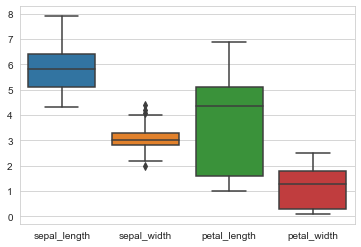

In [107]:
sns.boxplot(data=df);

In [108]:
q1=np.quantile(df["sepal_width"],0.25)
q3=np.quantile(df["sepal_width"],0.75)
iqr=q3-q1
uw=q3+1.5*iqr
lw=q1-1.5*iqr
index=df['sepal_width'][(df['sepal_width']>uw)|(df['sepal_width']<lw)].index
df.drop(index,inplace=True)

# Handling Skew

In [109]:
colname = df.select_dtypes("float64").columns
colname

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

sepal_length
0.2755486455422556


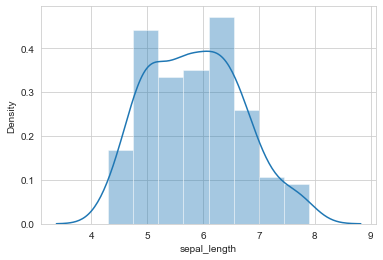

sepal_width
0.13936086405255294


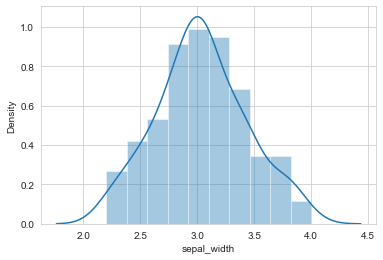

petal_length
-0.3203139458822894


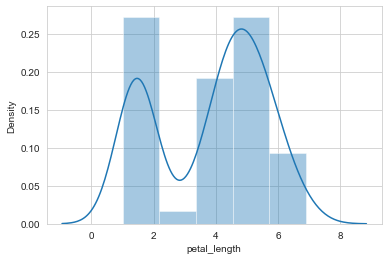

petal_width
-0.14724449955755323


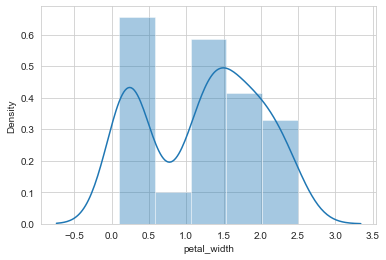

In [110]:
from scipy.stats import skew
for col in df[colname]:
    print(col)
    print(skew(df[col]))
    
    plt.figure()
    sns.distplot(df[col])
    plt.show()

# Heatmap

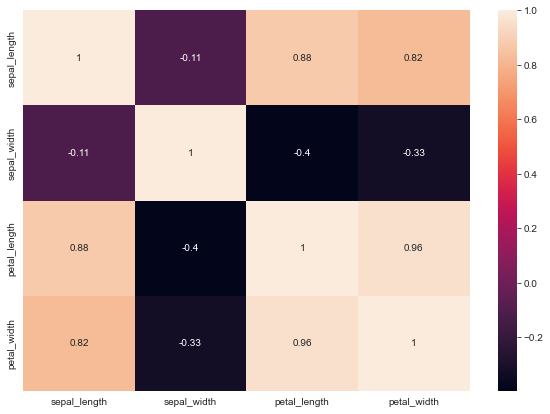

In [111]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)
plt.show()

# So from the following correlation we can find the petal_width as the high correlation that the petal_length

# Data Visualization

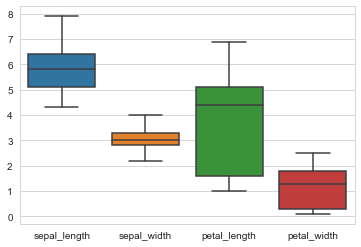

In [112]:
sns.boxplot(data=df);

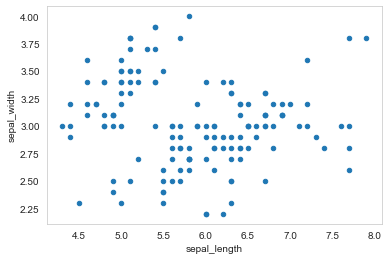

In [113]:
df.plot(kind="scatter", x="sepal_length", y="sepal_width")
plt.grid()
plt.show()

# Pairplot

We can see many types of relationships from the plot

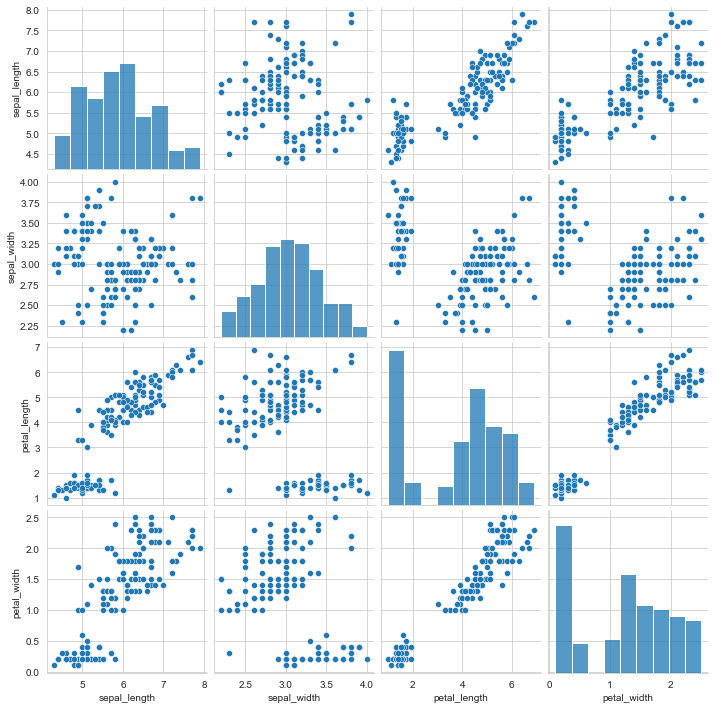

In [114]:
sns.pairplot(df)

# Class setosa has smallest petal width & length,It also has smallest sepal length but larger sepal widths

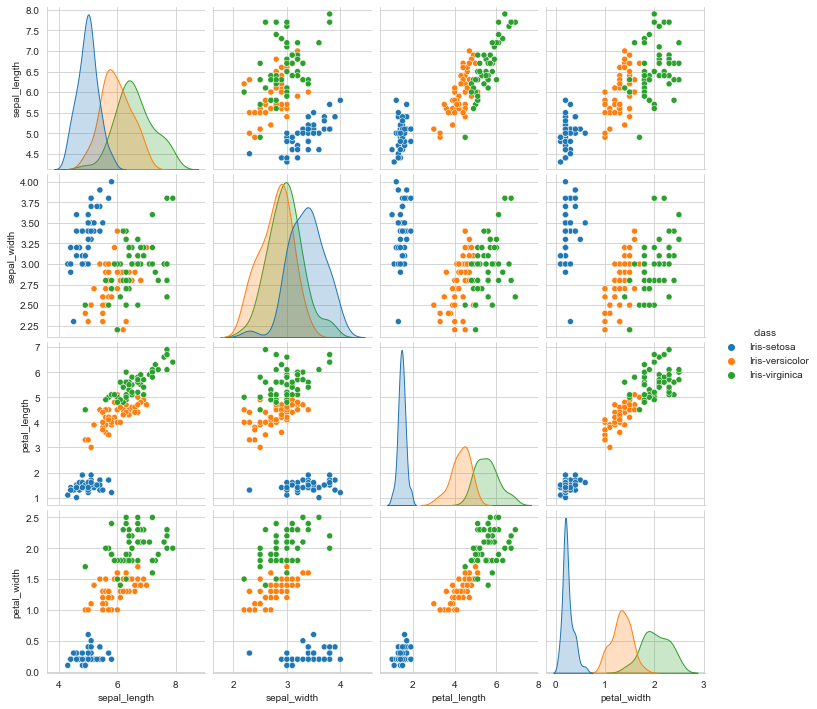

In [115]:
sns.pairplot(data=df,hue='class')

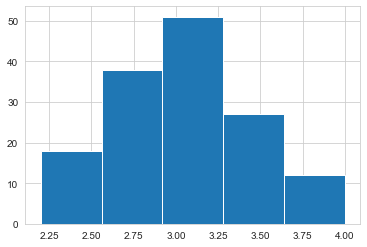

In [116]:
plt.hist(df.sepal_width,bins=5);

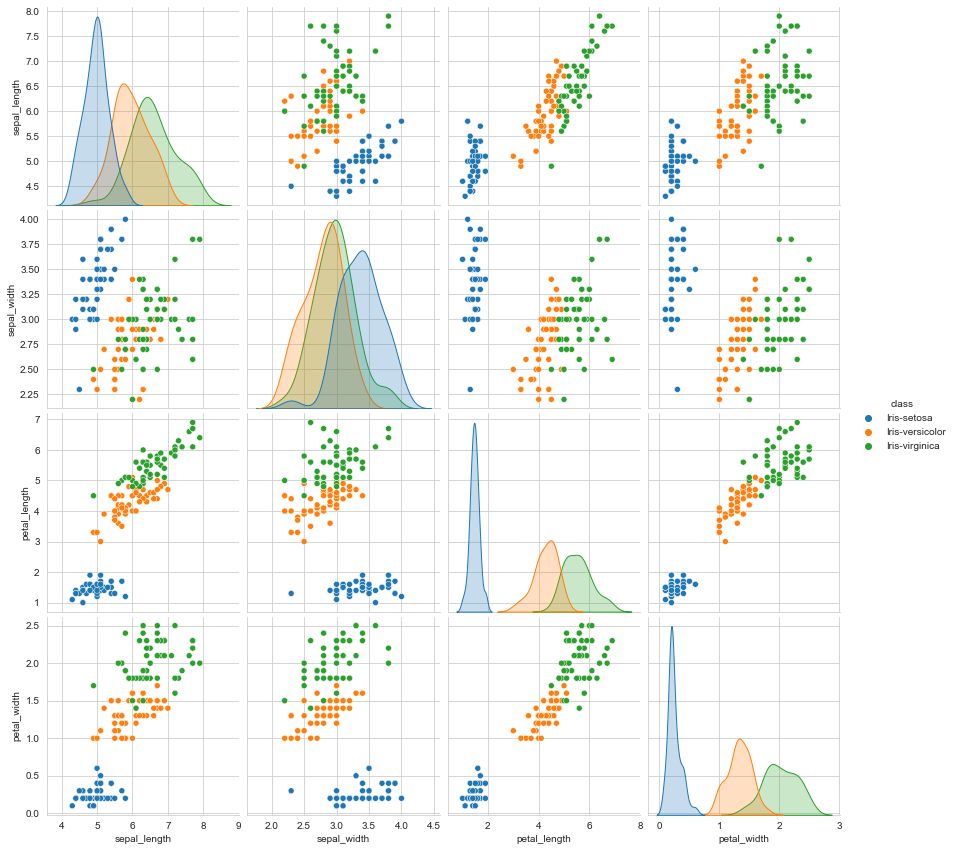

In [117]:
sns.set_style("whitegrid")
sns.pairplot(data=df, hue="class", size=3, diag_kind="kde")
plt.show()

In [118]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Encoding

In [119]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y = le.fit_transform(y)

# Train Test Split

In [120]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

# Train a Model

In [121]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(xtrain,ytrain)
ypred=svm.predict(xtest)

# Model Evaluation

In [122]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.87      0.93        15
           2       0.88      1.00      0.93        14

    accuracy                           0.95        44
   macro avg       0.96      0.96      0.95        44
weighted avg       0.96      0.95      0.95        44



In [123]:
train = svm.score(xtrain,ytrain)
test = svm.score(xtest,ytest)

print(f"Training Accuracy :{train}\nTesting Accuracy : {test}")

Training Accuracy :0.9803921568627451
Testing Accuracy : 0.9545454545454546


In [124]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [125]:
pipe=Pipeline(
    steps=[("scaler",StandardScaler()),("svm",SVC())])

In [126]:
pipe.fit(xtrain,ytrain)
ypred=pipe.predict(xtest)

In [127]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.87      0.93        15
           2       0.88      1.00      0.93        14

    accuracy                           0.95        44
   macro avg       0.96      0.96      0.95        44
weighted avg       0.96      0.95      0.95        44



In [128]:
train=pipe.score(xtrain,ytrain)
test=pipe.score(xtest,ytest)

print(f"Training Accuracy :{train}\n Testing Accuracy :{test}")

Training Accuracy :0.9705882352941176
 Testing Accuracy :0.9545454545454546


# GridSearch

import GridSearchCV from scikit learn

In [129]:
from sklearn.model_selection import GridSearchCV

In [130]:
parameter ={"C" : [0.1,1,10],"gamma" : [0.1,0.01,0.001],"kernel" : ["rbf"]}

In [131]:
grid=GridSearchCV(SVC(),parameter,verbose=3)
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.952 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.857 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.900 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.900 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.850 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.667 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.524 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.650 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.650 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.650 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.333 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=0.001, kernel=rbf;,

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=3)

In [132]:
grid.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [133]:
grid.best_score_

0.9804761904761905

In [134]:
grid.best_estimator_

SVC(C=10, gamma=0.1)

In [135]:
svm=grid.best_estimator_
svm.fit(xtrain,ytrain)
ypred=svm.predict(xtest)

In [136]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.93      0.97        15
           2       0.93      1.00      0.97        14

    accuracy                           0.98        44
   macro avg       0.98      0.98      0.98        44
weighted avg       0.98      0.98      0.98        44

